In [1]:
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import glob
import tqdm
import pandas as pd

In [2]:
# Reading the path of the images
query_paths = glob.glob(r'./TASK5/query/*.jpg')
database_paths = glob.glob(r'./TASK5/database/*.jpg')

In [3]:
# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

In [4]:
# Getting the orb descriptors of each query image (image not stored for fast computation)
D = [orb.detectAndCompute(cv2.imread(i,cv2.IMREAD_GRAYSCALE),None) for i in tqdm.tqdm(database_paths)]

100%|████████████████████████████████████████████████████████████████████████████| 15000/15000 [05:13<00:00, 47.84it/s]


In [5]:
# Getting the orb descriptors of each query image (image not stored for fast computation)
Q = [orb.detectAndCompute(cv2.imread(i,cv2.IMREAD_GRAYSCALE),None) for i in tqdm.tqdm(query_paths)] 

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 115.19it/s]


In [6]:
# Converting to a DataFrame for easy accessibility
Q1 = pd.DataFrame(Q,columns = ["Keypoints","Descriptors"])
D1 = pd.DataFrame(D,columns = ["Keypoints","Descriptors"])

In [7]:
# Using the brute force matcher to match descriptors
bf = cv2.BFMatcher()

In [8]:
# Getting the matches and indexing them
matches = {idx_1*15000+idx_2:bf.knnMatch(i, j, 2) for idx_1,i in enumerate(Q1["Descriptors"]) for idx_2,j in tqdm.tqdm(enumerate(D1["Descriptors"]))}

15000it [00:38, 391.69it/s]
15000it [00:35, 425.48it/s]
15000it [00:36, 414.62it/s]


In [9]:
# Apply lowe's ratio test
ratio_thresh = 0.7
g_matches = []
for idx,val in tqdm.tqdm(matches.items()):
    ctr = 0
    for m,n in val:
        if m.distance < ratio_thresh * n.distance:
            ctr+=1
    g_matches.append(ctr)

100%|██████████████████████████████████████████████████████████████████████████| 45000/45000 [00:05<00:00, 8193.37it/s]


In [10]:
# Getting the index of best match for each query
idx_q_1 = np.argmax(g_matches[0:15000])
idx_q_2 = np.argmax(g_matches[15000:30000])
idx_q_3 = np.argmax(g_matches[30000:45000])

In [11]:
# Getting the query and database images after 
q_image = []
for i in range(3):
    q_image.append(cv2.imread(query_paths[i],cv2.IMREAD_GRAYSCALE)) 

d_image = []
for j in [idx_q_1,idx_q_2,idx_q_3]: 
    d_image.append(cv2.imread(database_paths[j],cv2.IMREAD_GRAYSCALE))


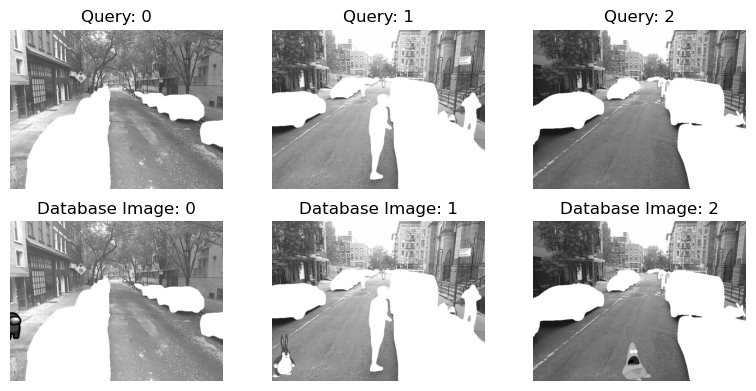

In [12]:
fig, ax = plt.subplots(2,3, figsize=(8,4))

for i in range(3):
    ax[0,i].imshow(q_image[i], cmap = 'gray')
    ax[1,i].imshow(d_image[i], cmap = 'gray')
    ax[0,i].set_title(f'Query: {i}') 
    ax[1,i].set_title(f'Database Image: {i}') 
    ax[0,i].axis('off')
    ax[1,i].axis('off')
plt.tight_layout()

# References
1.) [ORB Decritptor](https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html)<br>
2.) [Feature Matching](https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html)